<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [2]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


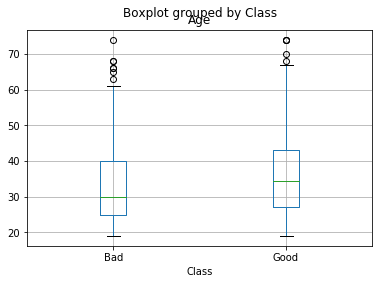

In [76]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt

credit_train.boxplot(by='Class', 
                       column=['Age'], 
                       grid=True)
plt.show()
# Comment whether age is a good predictor
# [payal] Age is not a good predictor since there is overlap between the two boxplots for good and bad classes

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [4]:
# Command:
table = credit_train[['CreditHistory.Critical','Class']]

critical = table.loc[table['CreditHistory.Critical'] == 1]
print('critical',critical.groupby(['Class']).size())

notcritical = table.loc[table['CreditHistory.Critical'] == 0]
print('not critical ',notcritical.groupby(['Class']).size())

# One sentence summary:
#[payal] person with critical credit history is more credit worthy since they are classified as good 83.25% of the time ( 189 out of 227 total records)

critical Class
Bad      38
Good    189
dtype: int64
not critical  Class
Bad     208
Good    373
dtype: int64


<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [61]:
credit_train['Class_binary'] = (credit_train['Class'] == 'Good').astype(int)

credit_train.head()


,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Class_binary
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0,1
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0,1


<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

y=credit_train['Class_binary']
X=credit_train.drop(['Class', 'Class_binary'], axis=1)

logreg = LogisticRegression()
model = logreg.fit(X, y)
print('model coef',model.coef_)
print('model intercept',model.intercept_)
print('model iterations',model.n_iter_)



model coef [[-2.40087017e-02 -5.76641600e-05 -1.80534102e-01  6.39207236e-02
   1.50416643e-02  4.27203206e-02  1.41426578e-01 -2.79077326e-01
  -2.65778765e-01 -1.85237712e+00 -1.13973406e+00 -6.73867616e-01
   2.20205068e-02  9.74863158e-01  7.41633915e-01  1.50197783e+00]]
model intercept [1.55014584]
model iterations [25]


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [95]:
# convert "Class" to binary
credit_test['Class_binary'] = (credit_test['Class'] == 'Good').astype(int)
# drop the output columns
X_test =credit_test.drop(['Class', 'Class_binary'], axis=1)
y_test =credit_test['Class_binary']

y_pred = olgreg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[ 18  36]
 [ 23 115]]


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [81]:
# Command that outputs acccuracy

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


<h3>Q.7. Generate the ROC curve.</h3>

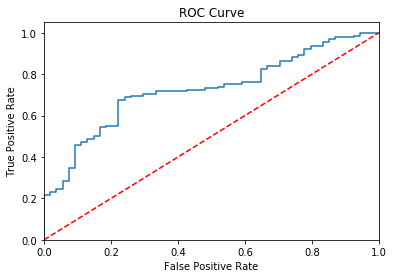

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

#plt.figure()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [66]:
# Command(s):
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

print('AUC = %0.2f' % logit_roc_auc)


AUC = 0.58


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<h3>Q.10. What is the accuracy of the new model?</h3>

In [75]:
X_test =credit_test.drop(['Class', 'Class_binary'], axis=1)
y_test =credit_test['Class_binary']

y_pred = lda.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print('Accuracy of LDA model on test set: {:.2f}'.format(lda.score(X_test, y_test)))

# [payal]accuracy is same 0.69

[[ 18  36]
 [ 24 114]]
Accuracy of LDA model on test set: 0.69


In [ ]:
#what was your incoming experience with this model, if any?
#[payal]I have never used this model before so all of this was good learning to me

#what steps you took, what obstacles you encountered.
#[payal]sklearn is very high level and masks the complex implementation so was able to implement test models easliy usinf standard documentation , no obstacles 

#how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
#[payal] the accuracy of the model i created is 69% , this appears to be on the lower side for real world implementation, 
#also will have to spend some more ime understanding the data to improve accuracy and improving model
#another real world challenge is to scale and optimize performance with huge amount of data